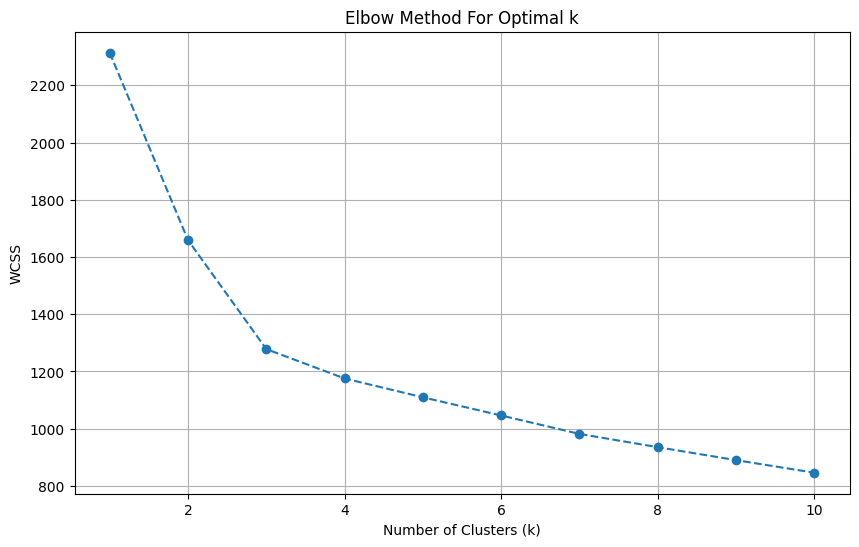

Please observe the elbow plot above to identify the optimal number of clusters.


In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/rerkki/data-analytics-ml/refs/heads/main/datasets/wine-clustering.csv", encoding='latin-1')

# Prepare the data for clustering
X = df.copy()

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
wcss = [] # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

print("Please observe the elbow plot above to identify the optimal number of clusters.")

In [13]:
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

df['Cluster'] = y_kmeans

print(f"KMeans clustering applied with {k} clusters.")
print("Cluster labels added to the DataFrame.")

KMeans clustering applied with 4 clusters.
Cluster labels added to the DataFrame.


### Cluster Characteristics

In [14]:
# Characterize the clusters
cluster_characteristics = df.groupby('Cluster').mean()
display(cluster_characteristics)

print("The table above shows the mean values of each feature for each cluster, helping to characterize them.")

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Cluster,,,,,,,,,,,,,
0,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
1,13.790545,1.931091,2.433636,16.783636,105.945455,2.856182,3.010000,0.285091,1.903273,5.625636,1.066182,3.157455,1142.036364
2,12.295111,1.709333,2.164222,19.726667,89.222222,2.030000,1.809556,0.396000,1.354667,2.981556,1.079689,2.684000,501.422222
3,12.342069,2.374483,2.437931,20.993103,105.517241,2.684828,2.590690,0.304138,2.087931,3.342759,1.020345,3.021379,580.034483


The table above shows the mean values of each feature for each cluster, helping to characterize them.


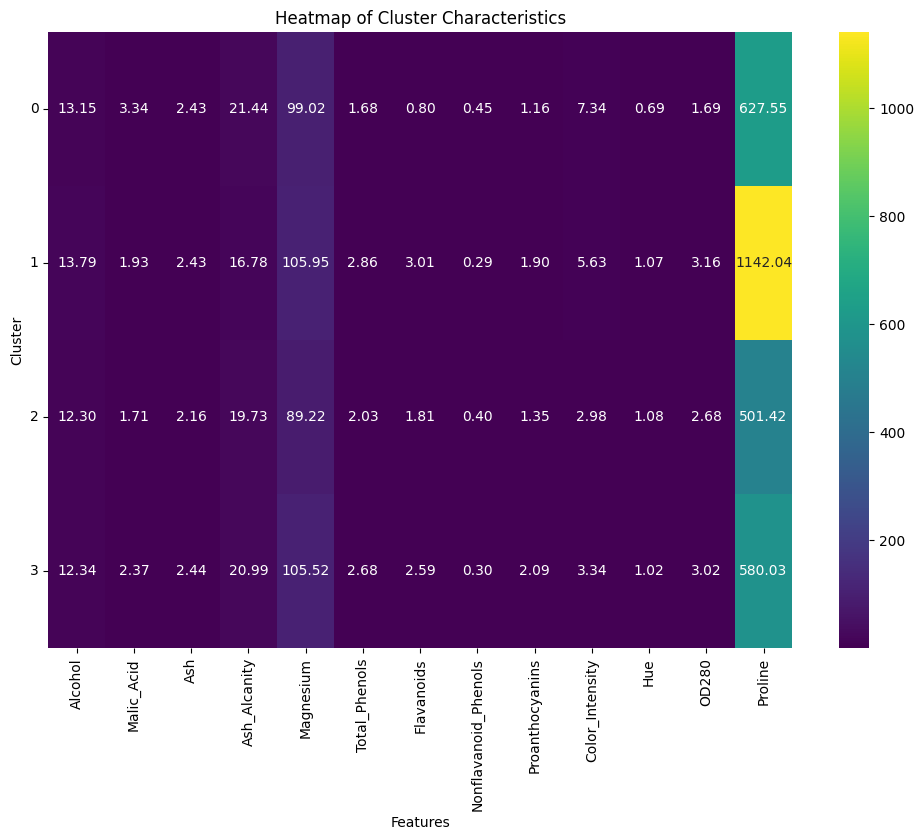

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_characteristics, annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap of Cluster Characteristics')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.yticks(rotation=0)
plt.show()